## El valor por defecto de los valores nulos es "NaN"

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)

In [4]:
df

,one,two,three
a,-2.258287,-0.612597,0.786727
c,0.567515,0.239107,0.671807
e,1.549997,0.373347,-0.777588
f,0.586574,-0.161387,0.972868
h,0.098660,-0.447358,0.654117


In [8]:
# Crear una nueva columna
df["four"] = "bar"

In [9]:
# Crear otra columna
df["five"] = df["one"] > 0

In [10]:
df

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


In [16]:
# Ahora vamos a reindexar, lo que creará filas vacias que tendrán valores NaN
df2 = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])

In [17]:
df2

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.567515,0.239107,0.671807,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.098660,-0.447358,0.654117,bar,True


## Para detectar si existen NA utilizaremos isna() and notna() - Devuelve un booleano

In [18]:
df2["one"]

a   -2.258287
b         NaN
c    0.567515
d         NaN
e    1.549997
f    0.586574
g         NaN
h    0.098660
Name: one, dtype: float64

In [19]:
pd.isna(df2["one"])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [15]:
df2["four"].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [21]:
# Podemos pasarlo a toda la tabla
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


## Fechas y horas

#### Para los tipos datetime64[ns], NaT representa los valores faltantes. Este es un valor centinela pseudo-nativo que puede ser representado por NumPy en un dtype singular (datetime64[ns]). Los objetos pandas proporcionan compatibilidad entre NaT y NaN.

In [32]:
df2 = df.copy()

In [33]:
df2["timestamp"] = pd.Timestamp("20120101")

In [34]:
df2

,one,two,three,four,five,timestamp
a,-2.258287,-0.612597,0.786727,bar,False,2012-01-01
c,0.567515,0.239107,0.671807,bar,True,2012-01-01
e,1.549997,0.373347,-0.777588,bar,True,2012-01-01
f,0.586574,-0.161387,0.972868,bar,True,2012-01-01
h,0.098660,-0.447358,0.654117,bar,True,2012-01-01


In [35]:
df2.loc[["a", "c", "h"], ["one", "timestamp"]] = np.nan

In [36]:
df2.dtypes.value_counts()

float64           3
object            1
bool              1
datetime64[ns]    1
dtype: int64

## Insertar datos faltantes

#### Puede insertar valores faltantes simplemente asignándolos a contenedores. El valor perdido real utilizado se elegirá en función del tipo de dato

In [37]:
s = pd.Series([1, 2, 3])

In [38]:
s

0    1
1    2
2    3
dtype: int64

In [39]:
s.loc[0] = None

In [40]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [41]:
s = pd.Series(["a", "b", "c"])

In [42]:
s.loc[0] = None

In [43]:
s.loc[1] = np.nan

In [44]:
s

0    None
1     NaN
2       c
dtype: object

## Calculos con missing data

#### 1. Al sumar datos, los valores NA (faltantes) se tratarán como cero.
#### 2. Si todos los datos son NA, el resultado será 0.
#### 3. Los métodos acumulativos como cumsum() y cumprod() ignoran los valores NA de forma predeterminada, pero los conservan en las matrices resultantes. Para anular este comportamiento e incluir valores NA, use skipna=False.

In [46]:
df

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


In [47]:
df["one"].sum()

0.544457901529349

In [48]:
df.mean(1)

C:\Users\equipo\AppData\Local\Temp\ipykernel_10928\3808537418.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(1)


a   -0.521039
c    0.619607
e    0.536439
f    0.599514
h    0.326355
dtype: float64

In [49]:
df.cumsum()

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,0
c,-1.690772,-0.373490,1.458533,barbar,1
e,-0.140776,-0.000143,0.680945,barbarbar,2
f,0.445798,-0.161530,1.653813,barbarbarbar,3
h,0.544458,-0.608888,2.307930,barbarbarbarbar,4


In [50]:
df.cumsum(skipna=False)

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,0
c,-1.690772,-0.373490,1.458533,barbar,1
e,-0.140776,-0.000143,0.680945,barbarbar,2
f,0.445798,-0.161530,1.653813,barbarbarbar,3
h,0.544458,-0.608888,2.307930,barbarbarbarbar,4


## Limpiar/rellenar datos faltantes

### Relleno de valores faltantes: fillna

#### fillna() puede “rellenar” valores NA con datos que no son NA de un par de maneras, que ilustramos

In [51]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.612597,0.786727,bar,False,NaT
c,NaN,0.239107,0.671807,bar,True,NaT
e,1.549997,0.373347,-0.777588,bar,True,2012-01-01
f,0.586574,-0.161387,0.972868,bar,True,2012-01-01
h,NaN,-0.447358,0.654117,bar,True,NaT


In [54]:
# Vamos a rellenar los valores de la primera columna con ceros
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,-0.612597,0.786727,bar,False,0
c,0.000000,0.239107,0.671807,bar,True,0
e,1.549997,0.373347,-0.777588,bar,True,2012-01-01 00:00:00
f,0.586574,-0.161387,0.972868,bar,True,2012-01-01 00:00:00
h,0.000000,-0.447358,0.654117,bar,True,0


In [53]:
df2["one"].fillna("missing")

a     missing
c     missing
e    1.549997
f    0.586574
h     missing
Name: one, dtype: object

#### Rellene los huecos hacia adelante o hacia atrás

In [59]:
# Usando los mismos argumentos de relleno que la reindexación, podemos propagar valores no NA hacia adelante o hacia atrás
# pad / ffill           Fill values forward
# bfill / backfill      Fill values backward
df

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


In [56]:
df.fillna(method="pad")

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


#### Limite la cantidad de relleno

In [57]:
df

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


In [58]:
df.fillna(method="pad", limit=1)

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


## Rellenar con objetos de Pandas (diccionarios o estadisticos)

In [60]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))

In [61]:
dff.iloc[3:5, 0] = np.nan

In [62]:
dff.iloc[4:6, 1] = np.nan

In [63]:
dff.iloc[5:8, 2] = np.nan

In [64]:
dff

,A,B,C
0,0.249586,-0.820838,0.900923
1,-0.234605,-0.202264,0.197031
2,-1.960347,1.097321,-0.282896
3,NaN,-1.038613,-0.634909
4,NaN,NaN,0.596685
5,-0.282642,NaN,NaN
6,0.526325,0.366011,NaN
7,0.699908,-1.398598,NaN
8,-1.762555,-0.479298,0.647863
9,-0.070666,-0.738423,0.721582


In [65]:
# Podemos rellenar los valores faltantes con la media
dff.fillna(dff.mean())

,A,B,C
0,0.249586,-0.820838,0.900923
1,-0.234605,-0.202264,0.197031
2,-1.960347,1.097321,-0.282896
3,-0.354375,-1.038613,-0.634909
4,-0.354375,-0.401838,0.596685
5,-0.282642,-0.401838,0.306611
6,0.526325,0.366011,0.306611
7,0.699908,-1.398598,0.306611
8,-1.762555,-0.479298,0.647863
9,-0.070666,-0.738423,0.721582


In [66]:
dff.fillna(dff.mean()["B":"C"])

,A,B,C
0,0.249586,-0.820838,0.900923
1,-0.234605,-0.202264,0.197031
2,-1.960347,1.097321,-0.282896
3,NaN,-1.038613,-0.634909
4,NaN,-0.401838,0.596685
5,-0.282642,-0.401838,0.306611
6,0.526325,0.366011,0.306611
7,0.699908,-1.398598,0.306611
8,-1.762555,-0.479298,0.647863
9,-0.070666,-0.738423,0.721582


In [67]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.249586,-0.820838,0.900923
1,-0.234605,-0.202264,0.197031
2,-1.960347,1.097321,-0.282896
3,-0.354375,-1.038613,-0.634909
4,-0.354375,-0.401838,0.596685
5,-0.282642,-0.401838,0.306611
6,0.526325,0.366011,0.306611
7,0.699908,-1.398598,0.306611
8,-1.762555,-0.479298,0.647863
9,-0.070666,-0.738423,0.721582


## Dropna: eliminación de filas con datos faltantes

#### Es posible que desee simplemente excluir etiquetas de un conjunto de datos que se refieran a datos faltantes. Para hacer esto, use dropna()

In [68]:
df

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


In [69]:
df.dropna(axis=0)

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


In [70]:
df.dropna(axis=1)

,one,two,three,four,five
a,-2.258287,-0.612597,0.786727,bar,False
c,0.567515,0.239107,0.671807,bar,True
e,1.549997,0.373347,-0.777588,bar,True
f,0.586574,-0.161387,0.972868,bar,True
h,0.098660,-0.447358,0.654117,bar,True


## Interpolacion para rellenar valores nulos

In [72]:
np.random.seed(2)

In [73]:
ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))

In [74]:
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

In [75]:
ser[missing] = np.nan

In [76]:
methods = ["linear", "quadratic", "cubic"]

In [77]:
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

<AxesSubplot:>

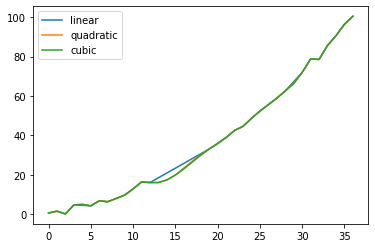

In [78]:
df.plot()

In [79]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)

In [80]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [81]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


## Sustitución de valores genéricos

#### Muchas veces queremos reemplazar valores arbitrarios con otros valores. replace() en Series y replace() en DataFrame proporciona una forma eficiente pero flexible de realizar dichos reemplazos.

In [82]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])

In [83]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [84]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [85]:
# Puede reemplazar una lista de valores por una lista de otros valores
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [86]:
# También se puede especificar un diccionario, donde el reeemplazo se haga por la posición del índice
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [87]:
# Para un DataFrame, puede especificar valores individuales por columna
df = pd.DataFrame({"a": [0, 1, 2, 3, 4], "b": [5, 6, 7, 8, 9]})

In [88]:
df.replace({"a": 0, "b": 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [89]:
# En lugar de reemplazar con valores específicos, puede tratar todos los valores dados como faltantes e interpolarlos
ser.replace([1, 2, 3], method="pad")

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

## Reemplazo de strings con Expresiones Regulares - regex=True

In [90]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}

In [91]:
df = pd.DataFrame(d)

In [92]:
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [93]:
# Ahora hágalo con una expresión regular que elimine los espacios en blanco circundantes (regex -> regex)
df.replace(r"\s*\.\s*", np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [95]:
# Reeemplazo con una lista
df.replace(["a", "."], ["b", np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [96]:
# Ahora con una lista, pero con Expresiones Regulares
df.replace([r"\.", r"(a)"], ["dot", r"\1stuff"], regex=True)

,a,b,c
0,0,astuff,astuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


In [97]:
# Una búsqueda con diccionario
df.replace({"b": "."}, {"b": np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [98]:
# Ahora apliquemos un diccionario, pero con Expresiones Regulares
df.replace({"b": r"\s*\.\s*"}, {"b": np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [99]:
df.replace({"b": {"b": r""}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


In [100]:
df.replace({"b": r"\s*(\.)\s*"}, {"b": r"\1ty"}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


In [101]:
df.replace([r"\s*\.\s*", r"a|b"], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


## Reemplazo con valores númericos

#### replace() es similar a fillna()

In [102]:
df = pd.DataFrame(np.random.randn(10, 2))

In [103]:
df[np.random.rand(df.shape[0]) > 0.5] = 1.5

In [104]:
df.replace(1.5, np.nan)

,0,1
0,-0.844214,0.000010
1,NaN,NaN
2,0.771012,-1.868091
3,1.731185,1.467678
4,NaN,NaN
5,0.047971,-0.829135
6,NaN,NaN
7,-0.381093,-0.375669
8,-0.074471,0.433496
9,1.278379,-0.634679


In [105]:
df00 = df.iloc[0, 0]

In [106]:
df.replace([1.5, df00], [np.nan, "a"])

,0,1
0,a,0.000010
1,NaN,NaN
2,0.771012,-1.868091
3,1.731185,1.467678
4,NaN,NaN
5,0.047971,-0.829135
6,NaN,NaN
7,-0.381093,-0.375669
8,-0.074471,0.433496
9,1.278379,-0.634679
